<a href="https://colab.research.google.com/github/FabianGarciaXY/Proyecto-Python/blob/main/Proyecto_python_bedu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# **Analisis de Sentimientos en Amazon reviews**
### **Proyecto de Procesamiento de Datos con Python**
</div>


---



![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

---



*Proyecto de procesamiento y analisis de un dataset usando `Python`, `Pandas` y una API basada en NLP para analisis de sentimientos como por parte del modulo 3 en BEDU.* 
*16 Septiembre de 2022* 

<br>

**Equipo #14:**

* *Moises Rubio*
* *Cesar*
* *Fabian*
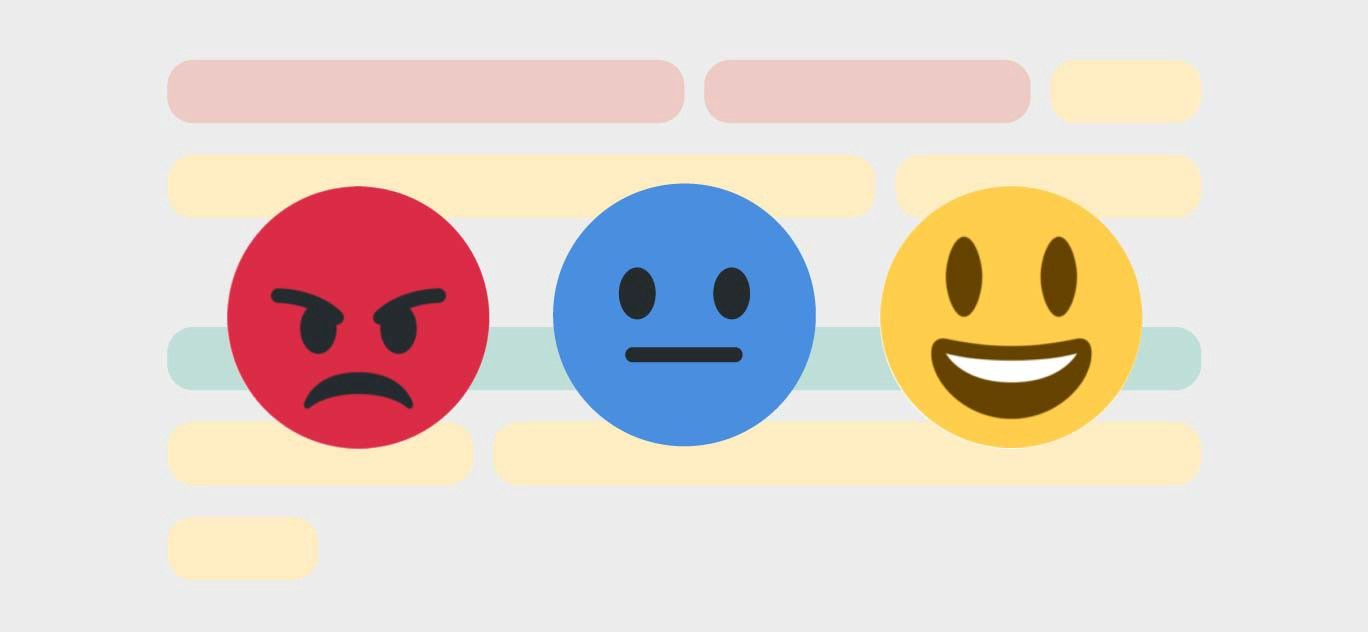
<br>

**Definición del problema:**

Amazon es una compañía estadounidense de comercio electrónico y servicios de computación en la nube a todos los niveles con sede en la ciudad de Seattle, Washington. Su lema es: From A to Z. Como equipo de Ciencia de datos de Amazon, se nos ha solicitado evaluar las relaciones precio/sentimientos.

Se busca contestar las siguientes preguntas:
* *Realizar análisis exploratorios de calificaciones y revisiones.*
* *Descubrir la relación entre el precio y el número de reseñas (cesar).*
* *Descubrir la relación entre la utilidad de la revisión y la duración de la revisión (fabian).*
* *Descubrir la relación entre la duración de la reseña y el precio del producto (César).*
* *Averigüar la relación entre la duración de la revisión y la calificación del producto (fabian).*
* *Averigüar la relación entre el precio del producto y la calificación del producto (Cesar).*
* *Nube de palabras de las palabras más utilizadas (Fabían, gráfico tipo MENTI)*
* *Análisis de los sentimientos (relación entre positivos, negativos, neutros).(MOi)*
* ¿Qué productos tienen mayor cantidad de reseñas negativas?
* ¿Qué marca tienen mayor cantidad de reseñas negativas?
* ¿Qué marca tienen mayor porcentaje de reseñas negativas?


**Dataset:**

La base de datos llamada ["Amazon_Unlocked_Mobile_original"](https://www.kaggle.com/code/rahulvks/customer-review-analysis/data) contiene reseñas de compras de articulos en Amazon.com.


---


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


---




#### **Obtencion del Dataset**

Buscamos varios data sets antes de elegir el final. También encontramos un proyecto de análiss de sentimientos en trip advisor que nos ayudó a entender como funcionan los algoritmos usados hoy en día.

Link de la base de datos inicial -  
https://www.kaggle.com/datasets/bittlingmayer/amazonreviews

Notebook de analysis de sentimientos con tranformadores -    
https://www.kaggle.com/code/emirkocak/in-depth-series-sentiment-analysis-w-transformers/notebook





---


![divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


---

In [ ]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [ ]:
# Lectura del DataFrame
df_original = pd.read_csv("https://media.githubusercontent.com/media/FabianGarciaXY/Proyecto-Python/main/data/amazon_reviews_dirty.csv")
df_reviews = df_original.copy()

#### **Exploración del Dataframe**

In [ ]:
# Exploracion
df_reviews.tail()

,Unnamed: 0,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,"""5""",another great deal great price,"""0.0"""
413836,413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,"""3""",Ok,"""0.0"""
413837,413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,"""5""",Passes every drop test onto porcelain tile!,"""0.0"""
413838,413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,"""3""",I returned it because it did not meet my needs...,"""0.0"""
413839,413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,"""4""",Only downside is that apparently Verizon no lo...,"""0.0"""


In [ ]:
df_reviews.shape

(413840, 7)

In [ ]:
# Registros y columnas
print(f"El dataset cuenta con, {df_reviews.shape[0]} filas. \nY un total de {df_reviews.shape[1]} columnas y 1 indice por default.")

El dataset cuenta con, 413840 filas. 
Y un total de 7 columnas y 1 indice por default.


In [ ]:
# Tipos de datos
print("Tipos de datos: \n")
df_reviews.dtypes

Tipos de datos: 



Unnamed: 0        int64
Product Name     object
Brand Name       object
Price           float64
Rating           object
Reviews          object
Review Votes     object
dtype: object

In [ ]:
# Detalles de las columnas
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    413840 non-null  int64  
 1   Product Name  413840 non-null  object 
 2   Brand Name    348669 non-null  object 
 3   Price         407907 non-null  float64
 4   Rating        413840 non-null  object 
 5   Reviews       413778 non-null  object 
 6   Review Votes  413840 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.1+ MB


In [ ]:
# Valores unicos en la serie "Brand_Name" y "Rating"
number_of_brands = df_reviews["Brand Name"].unique().size
types_of_ratings = df_reviews["Rating"].unique()

print(f"Hay un total de {number_of_brands} marcas la columna 'Brand Name'")
print(f"Los tipos de ratings que hay son: {types_of_ratings} en la columna 'Rating'")

Hay un total de 385 marcas la columna 'Brand Name'
Los tipos de ratings que hay son: ['"5"' '"4"' '"1"' '"2"' '"3"'] en la columna 'Rating'


---
<br>

<div align=center>

**Hasta este punto se observaron los siguientes detalles importantes:**<br>

</div>

* *El dataset contiene 413,840 filas y 6 columnas.*
* *Las columnas son: "Product Name", "Brand Name", "Price", "Rating", "Reviews", "Review Votes".*
* *3 columnas contienen datos numéricos: "Price", "Rating" y "Review Votes", pero solo "Price" es tipo Float, los demas son Object por lo que deben transformarse.*
* *Las columnas "Rating", "Brand Name" contienen datos categoricos.*
* *Son Reseñas de teléfonos móviles desbloqueados vendidos en Amazon.com.*
* *4 de las 6 columnas contienen datos nulos que sera necesario limpiar: "Brand Name", "Price", "Review" y "Review Votes".*

<br>

---

#### **Transformación y Limpieza de Datos**

*Se elimina la columna `Unnamed: 0` ya que es un indice no necesario* y se renombran las columnas.

In [ ]:
# Primero eliminamos la columna "unnamed:_0" ya que al parecer era un indice
df_reviews = df_reviews.drop(columns=["Unnamed: 0"], axis=0)
df_reviews.columns.tolist()

['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews', 'Review Votes']

In [ ]:
# Renombramos las columnas con la convención snake_case
list_of_names = list(df_reviews.columns)
map_of_names = {value: value.lower().replace(" ", "_") for value in list_of_names}

df_reviews = df_reviews.rename(map_of_names, axis=1)

df_reviews.columns.tolist()

['product_name', 'brand_name', 'price', 'rating', 'reviews', 'review_votes']

In [ ]:
df_reviews['brand_name'].value_counts()

Samsung                     32247
BLU                         16856
Apple                       15584
LG                          12327
Nokia                        8749
                            ...  
MOTOROLA                        1
ToShare Tech                    1
M-HORSE                         1
Marozi International Ltd        1
Danger Inc.                     1
Name: brand_name, Length: 373, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('Sam', na=False)].value_counts()

Samsung                  32247
Samsung Korea               99
Samssung                    80
Samsung international       32
Samsung Korea LTD           27
Samsung/Straight Talk        9
Samsung Galaxy               3
Samsung International        2
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('Sam', na=False)] = "Samsung"

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('Sam', na=False)].value_counts()

Samsung    32499
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('App', na=False)].value_counts()

Apple             15584
Apple Computer       10
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('App', na=False)].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('App', na=False)].value_counts()

Apple    15594
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('LG', na=False)].value_counts()

LG                               12327
LG Electronics                    1435
LG Electronics MobileComm USA      274
LGIC                                21
LGG                                  2
LG Electronic                        1
Name: brand_name, dtype: int64

In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('LG', na=False)]="LG"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df_reviews['brand_name'].loc[df_reviews['brand_name'].str.startswith('LG', na=False)].value_counts()

LG    14060
Name: brand_name, dtype: int64

*La columna "review_votes" es de tipo object pero con valores que contienen comillas extras ("") por lo que no permiten transformarlos a Int con `astype()` directamente, por lo cual primero se eliminan las esas comillas extras.*

In [ ]:
# review_votes con comillas extras
df_reviews["review_votes"].head(5)

0    "1.0"
1    "0.0"
2    "0.0"
3    "0.0"
4    "0.0"
Name: review_votes, dtype: object

In [ ]:
# Removemos las comillas extras
df_reviews['review_votes'] = df_reviews['review_votes'].map(lambda value: value.lstrip('"').rstrip('"'))

# Y convertimos a Integer
df_reviews["review_votes"] = df_reviews["review_votes"].apply(lambda value: float(value) if value else value)

df_reviews["review_votes"].dtypes

dtype('float64')

*Realizamos el mismo proceso con `rating`.*

In [ ]:
# Removemos las comillas extras
df_reviews['rating'] = df_reviews['rating'].map(lambda value: value.lstrip('"').rstrip('"'))

# Y convertimos a Integer
df_reviews["rating"] = df_reviews["rating"].apply(lambda value: int(value) if value else value)

print("rating es tipo: ", df_reviews["rating"].dtypes)

rating es tipo:  int64


In [ ]:
df_reviews.dtypes

product_name     object
brand_name       object
price           float64
rating            int64
reviews          object
review_votes    float64
dtype: object

<br>

*Contando con los tipos de datos adecuados ya es posible remover los NaNs o faltantes para tener el DataFrame completamente operable.*

*Empezamos contando la cantidad de datos nulos en nuestro dataset*

In [ ]:
# Obtenemos la cantidad y porcentages datos nulos por columna
def get_null_values():
  print("Cantidad de NaNs:\n") 
  print(df_reviews.isna().sum(), "\n\n")
  print("Porcentage de NaNs:\n")
  print(df_reviews.isna().sum() / (len(df_reviews) * 100))

get_null_values()

Cantidad de NaNs:

product_name        0
brand_name      65171
price            5933
rating              0
reviews            62
review_votes    12296
dtype: int64 


Porcentage de NaNs:

product_name    0.000000
brand_name      0.001575
price           0.000143
rating          0.000000
reviews         0.000001
review_votes    0.000297
dtype: float64


---
* *La columna con mas NaNs es "brand_name" con 65171 datos faltantes. \
Al ser nombres de marcas (datos categóricos) sería posible rellenarlos con la moda, pero sesgaría los datos reales al rellenar esos 65171 datos con una sola marca.\
Por lo cual lo mas adecuado es eliminar las filas que no contengan Marcas.*

---

In [ ]:
# Removemos los NaNs en "brand_name"
df_reviews = df_reviews.dropna(subset=["brand_name"])

# Verificamos los la cantidad de NaNs sea 0
print(df_reviews["brand_name"].isna().sum(), 'datos nulos en "brand_name"')

0 datos nulos en "brand_name"


---
* *La siguente columna es "reviews" que contienen muy pocos datos NaNs.\
Sin embargo son datos crŕticos ya que se usarán solicitar a la API de Sentiment Analisys el sentimiento que hay en la reseña por lo cual NO puede existir datos Nulos, por lo cual tambien deben ser removidos.*
---

In [ ]:
# Removiendo los NaNs en "reviews"
df_reviews = df_reviews.dropna(subset=["reviews"])

# Verificamos los la cantidad de NaNs sea 0
print(df_reviews["reviews"].isna().sum(), 'datos nulos en la columna "reviews"')

0 datos nulos en la columna "reviews"


<br>

*A continuación la columna review votes contiene la cantidad reseñas hay en cada producto*

In [ ]:
# Estadisticos de la columna "review_votes"
df_reviews["review_votes"].describe()

count    338317.000000
mean          1.475634
std           9.188371
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         645.000000
Name: review_votes, dtype: float64

*Podemos ver que la media es de 1.4 reseñas y que el 75% almenos posee 1 reseña\
Al tratarse de datos no tan criticos se rellenaran con la **media**.*

In [ ]:
# Rellenamos con la media en review_votes
df_reviews["review_votes"] = df_reviews["review_votes"].fillna(df_reviews["review_votes"].mean())

Continuaremos con la limpieza de la columna reviews, y el análisis del mismo

In [ ]:
df_reviews["reviews"].duplicated().sum()

205501

Hemos detectado 205,501 lineas repetidas, por lo que procederemos a borrarlas y mantener la primera registrada

In [ ]:
df_reviews = df_reviews.drop_duplicates(subset="reviews", keep="first")

In [ ]:
df_reviews.duplicated().sum()

0

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143122 entries, 0 to 413829
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   product_name  143122 non-null  object 
 1   brand_name    143122 non-null  object 
 2   price         140972 non-null  float64
 3   rating        143122 non-null  int64  
 4   reviews       143122 non-null  object 
 5   review_votes  143122 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.6+ MB


In [ ]:
df_reviews.reset_index(drop=True)

,product_name,brand_name,price,rating,reviews,review_votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
143117,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,works great and picks up signal in place my ot...,0.0
143118,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Great phone. Large keys, best flip phone I hav...",0.0
143119,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Pros...Works great, very durable, easy to navi...",0.0
143120,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,just as described perfect for the price,0.0


Calcularemos los deciles

In [ ]:
df_reviews.shape[0]/100


1431.22

Tomamos por 50-51

In [ ]:
print(df_reviews.shape[0]/100*50)
df_reviews.shape[0]/100*51


71561.0


72992.22

In [ ]:
df_sentiment=df_reviews.iloc[71561:72992, :]

In [ ]:
df_sentiment.reset_index(drop = True)

,product_name,brand_name,price,rating,reviews,review_votes
0,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,NaN,4,"unlocked phone work, but phone call is slow, p...",0.0
1,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,NaN,5,I am so happy to find a new (and in the box) r...,1.0
2,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,NaN,1,It's not good at all,0.0
3,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,NaN,3,"Great phone! Fun. Keep in mind, doesn't work w...",0.0
4,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,NaN,2,Prefer the lgg2 it's nicer ..sorry,0.0
...,...,...,...,...,...,...
1426,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,For now is working excellent. I'm a Windows ph...,0.0
1427,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,Best phone I've ever owned! Had it for about 3...,2.0
1428,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,Everything worked great with my new Lumia 950....,0.0
1429,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,I am windows phone user since 5 years. I upgra...,0.0


In [ ]:
df_sentiment.dtypes

product_name     object
brand_name       object
price           float64
rating            int64
reviews          object
review_votes    float64
dtype: object

In [ ]:
df_sentiment_no_emojis=df_sentiment.astype('string').apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [ ]:
url = "https://japerk-text-processing.p.rapidapi.com/sentiment/"
headers = {
  "content-type": "application/x-www-form-urlencoded",
  "X-RapidAPI-Key": "6005627361mshf5ac6e9e243228fp1b445ajsn6f356e95d9b7",
  "X-RapidAPI-Host": "japerk-text-processing.p.rapidapi.com"
}

In [ ]:
def getSentiment(value):
  
  #Por favor no uses mi Api Key, tenemos un numero limitado de requests muy pequeño y se va a bloquear.

  
  response = requests.request("POST", url, data="language=english&text="+value, headers=headers)
  print("Status code: ", response.status_code)
  print("Printing Entire Post Request")
  print(response.json())
  json = response.json()
  y = json['label']
  if y=='pos':
    return 1
  elif y=='neg':
    return -1
  else:
    return 0

In [ ]:
df_sentiment_no_emojis['sentiment'] = df_sentiment_no_emojis['reviews'].apply(getSentiment)


Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.8072128980708303, 'neutral': 0.27946350099722567, 'pos': 0.1927871019291697}, 'label': 'neg'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.5701998218625336, 'neutral': 0.15404430235516822, 'pos': 0.4298001781374664}, 'label': 'neg'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.6263493482844626, 'neutral': 0.14618920379528105, 'pos': 0.37365065171553735}, 'label': 'neg'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.867390180789545, 'neutral': 0.1784742169239718, 'pos': 0.13260981921045503}, 'label': 'neg'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.6409282539861325, 'neutral': 0.04156001081299201, 'pos': 0.35907174601386743}, 'label': 'neg'}
Status code:  200
Printing Entire Post Request
{'probability': {'neg': 0.44397901527983596, 'neutral': 0.3124399334526125, 'pos': 0.556020984720164}, 'label': 'pos'

In [ ]:
df_sentiment_no_emojis

,product_name,brand_name,price,rating,reviews,review_votes,sentiment
237550,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,<NA>,4,"unlocked phone work, but phone call is slow, p...",0.0,-1
237551,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,<NA>,5,I am so happy to find a new (and in the box) r...,1.0,-1
237552,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,<NA>,1,It's not good at all,0.0,-1
237553,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,<NA>,3,"Great phone! Fun. Keep in mind, doesn't work w...",0.0,-1
237554,"LG Thrill 4G P925 Unlocked GSM Phone with 3G, ...",LG,<NA>,2,Prefer the lgg2 it's nicer ..sorry,0.0,-1
...,...,...,...,...,...,...,...
240812,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,For now is working excellent. I'm a Windows ph...,0.0,1
240813,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,Best phone I've ever owned! Had it for about 3...,2.0,-1
240814,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,Everything worked great with my new Lumia 950....,0.0,0
240815,Microsoft Lumia 950 32GB DUAL SIM NAM RM-1118 ...,Microsoft,349.99,5,I am windows phone user since 5 years. I upgra...,0.0,-1


In [ ]:
df_sentiment_no_emojis["sentiment"]=df_sentiment_no_emojis["sentiment"].astype("category")

In [ ]:
df_sentiment_no_emojis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 237550 to 240816
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   product_name  1431 non-null   object  
 1   brand_name    1431 non-null   object  
 2   price         1368 non-null   object  
 3   rating        1431 non-null   object  
 4   reviews       1431 non-null   object  
 5   review_votes  1431 non-null   object  
 6   sentiment     1431 non-null   category
dtypes: category(1), object(6)
memory usage: 79.8+ KB


In [ ]:
df_sentiment_no_emojis.dtypes

product_name      object
brand_name        object
price             object
rating            object
reviews           object
review_votes      object
sentiment       category
dtype: object

In [ ]:
df_sentiment_no_emojis.describe()

,product_name,brand_name,price,rating,reviews,review_votes,sentiment
count,1431,1431,1368,1431,1431,1431,1431
unique,62,20,53,5,1431,34,3
top,LG Xenon GR500 Unlocked Phone with QWERTY Keyb...,LG,129.99,5,"unlocked phone work, but phone call is slow, p...",0.0,-1
freq,260,765,260,609,1,889,637


<br>

---
* *La ultima columna con NaNs es "price" en el cual no se puede rellenar con 0s o con el precio ya que podría afectar al precio real del producto por lo cual en este caso se eliminaran también.*

---

In [ ]:
# Removiendo los datos NaNs en "price"
df_reviews = df_reviews.dropna(subset=["price"])

# Verificando que el dataset este limpio
print(get_null_values())

print(df_reviews.dtypes)

Cantidad de NaNs:

product_name    0
brand_name      0
price           0
rating          0
reviews         0
review_votes    0
dtype: int64 


Porcentage de NaNs:

product_name    0.0
brand_name      0.0
price           0.0
rating          0.0
reviews         0.0
review_votes    0.0
dtype: float64
None
product_name     object
brand_name       object
price           float64
rating            int64
reviews          object
review_votes    float64
dtype: object


***El dataset ya no posee ningun dato nulo, y contiene los tipos de datos correctos***

#### **Análisis de Datos**

In [ ]:
# se atribuye a una variable la lectura del Dataframe
#df=pd.read_csv("Amazon_clean.csv")
#df = pd.read_csv("/content/Amazon_clean.csv",  encoding='utf-8', quoting=csv.QUOTE_NONE, error_bad_lines=False) NO ES NECESARIO; PRIMERO IMPORTAR EL ARCHIVO AL ENTORNO DE COLAB

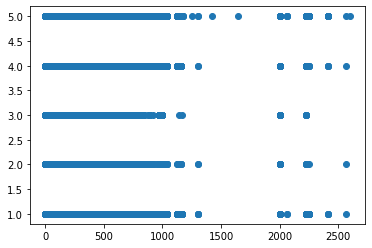

In [ ]:
#se crea el diagrama de dispersión entre 2 columnas
plt.scatter(df_reviews['price'], df_reviews['rating'])


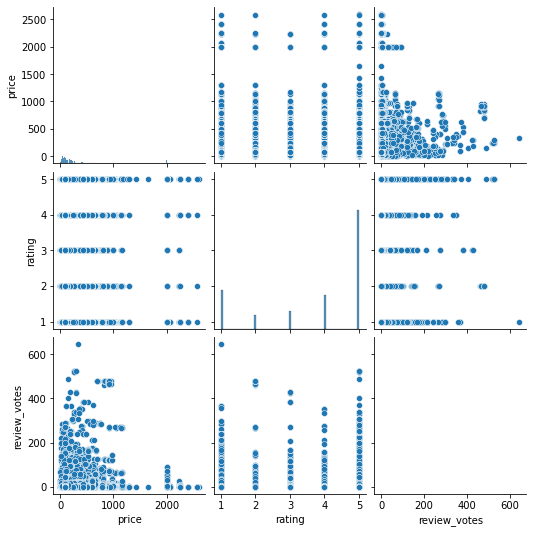

In [ ]:
sns.pairplot(df_reviews)